In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sqlalchemy import create_engine

In [34]:
engine = create_engine("postgresql://postgres:@localhost:5432/postgres")
# подключение к базе данных PostgreSQL с помощью SQLAlchemy
df = pd.read_sql("""
SELECT
    country,
    count(*) as cnt
FROM netflix
GROUP BY country
ORDER BY cnt desc
LIMIT 20""", engine)  
df

,country,cnt
0,United States,2818
1,India,972
2,,831
3,United Kingdom,419
4,Japan,245
5,South Korea,199
6,Canada,181
7,Spain,145
8,France,124
9,Mexico,110


In [22]:
df = pd.read_sql("""
SELECT type, COUNT(*)
FROM netflix
GROUP BY type
""", engine) 
# запрос к базе данных PostgreSQL и сохранение результата в DataFrame
df 

,type,count
0,Movie,6131
1,TV Show,2676


<Axes: xlabel='type'>

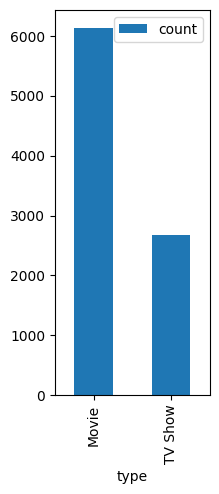

In [23]:
df.plot(kind='bar', x='type', y='count', figsize=(2,5))

In [24]:
df = pd.read_sql("""
SELECT country, release_year, COUNT(*) AS cnt
FROM netflix
WHERE release_year >= 2000 
GROUP BY country, release_year
ORDER BY cnt DESC 
LIMIT 20""", engine) 
# запрос к базе данных PostgreSQL и сохранение результата в DataFrame    
df

,country,release_year,cnt
0,United States,2018,356
1,United States,2017,352
2,United States,2019,351
3,United States,2020,336
4,United States,2016,263
5,,2021,209
6,United States,2015,145
7,United States,2021,138
8,,2019,117
9,,2018,109


In [25]:
df_yearly = df.groupby('release_year')['cnt'].sum()
df

,country,release_year,cnt
0,United States,2018,356
1,United States,2017,352
2,United States,2019,351
3,United States,2020,336
4,United States,2016,263
5,,2021,209
6,United States,2015,145
7,United States,2021,138
8,,2019,117
9,,2018,109


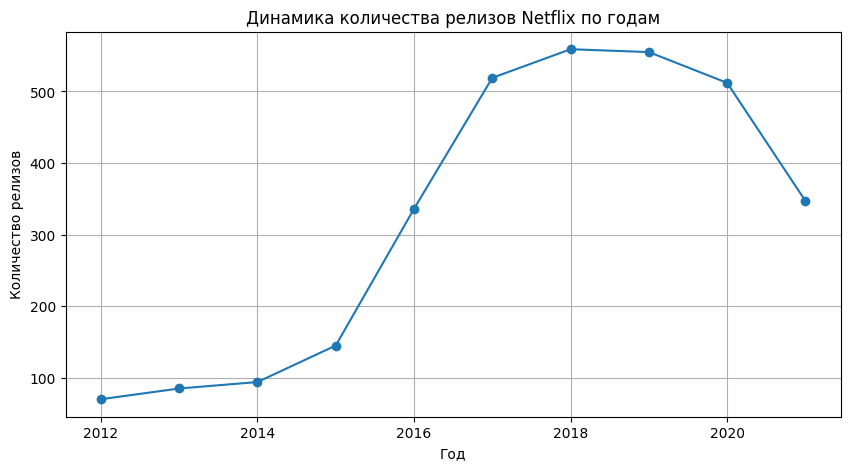

In [26]:
yearly = df.groupby('release_year')['cnt'].sum()
# агрегирование данных по годам выпуска и подсчет 
# общего количества релизов за каждый год
yearly.plot(kind='line', figsize=(10,5), marker='o')  
plt.title('Динамика количества релизов Netflix по годам')
plt.xlabel('Год')
plt.ylabel('Количество релизов') 
plt.grid(True)
plt.show() # построение линейного графика 
# динамики количества релизов Netflix по годам


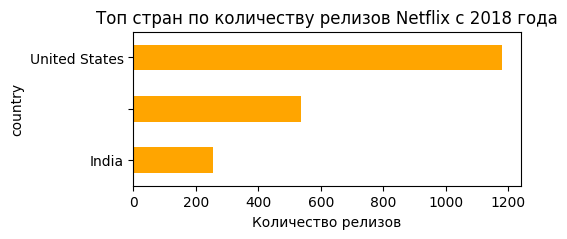

In [27]:
recent = df[df['release_year'] >= 2018]  # последние 5 лет, например
recent_top = recent.groupby('country')['cnt'].sum().sort_values(ascending=False).head(10)
# агрегирование данных по странам за последние годы и выбор топ-10 стран
recent_top.plot(kind='barh', figsize=(5,2), color='orange')
plt.title('Топ стран по количеству релизов Netflix с 2018 года')
plt.xlabel('Количество релизов')
plt.gca().invert_yaxis()
plt.show()


In [28]:
df['percent'] = df['cnt'] / df['cnt'].sum() * 100
# расчет процента релизов по странам
df[['country','percent']].groupby('country').sum().sort_values(by='percent', ascending=False).head(10)
# расчет процента релизов по странам и вывод топ-10 стран

,percent
country,
United States,67.970205
,16.635630
India,13.345748
United Kingdom,2.048417


In [31]:
df = pd.read_csv(r"C:\Jupyter_notebook\PandasNumPyCourse\data\netflix.csv")
df.head() # первые строки, чтобы увидеть названия колонок и примеры данных
# информация о датафрейме

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.describe().round()

,release_year
count,8807.0
mean,2014.0
std,9.0
min,1925.0
25%,2013.0
50%,2017.0
75%,2019.0
max,2021.0


In [ ]:
df.info() # получение статистического резюме по числовым столбцам

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
df['type'].value_counts() # подсчет уникальных значений в столбце 'type'


type
Movie      6131
TV Show    2676
Name: count, dtype: int64

In [ ]:
df['listed_in'].str.split(', ').explode().value_counts().head(10) 


listed_in
International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64

<Axes: xlabel='release_year'>

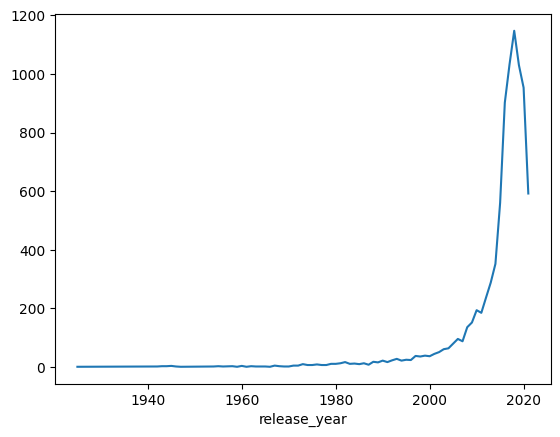

In [ ]:
df['release_year'].value_counts().sort_index().plot(kind='line') 
# график количества фильмов и сериалов по годам выпуска 


In [ ]:
df['director'].value_counts().head(10)


director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Suhas Kadav               16
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Steven Spielberg          11
Name: count, dtype: int64